In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-inflation/US_inflation.png
/kaggle/input/df-shizheng/merged_data.csv


In [4]:
df_shizheng = '/kaggle/input/df-shizheng/merged_data.csv'

In [31]:
import pandas as pd
df=pd.read_csv(df_shizheng, delimiter=';')
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%Y-%m')
df_10=df
df

,date,international_trans,interest_margin,gdp,inflation,df_sum_value
0,2024-04,-3346.33,3.670067,-0.2,1.370370,153.20
1,2024-03,-4103.00,3.468048,0.3,1.461538,149.79
2,2024-02,-4103.00,3.501286,0.3,1.357143,149.62
3,2024-01,-4103.00,3.405682,0.3,1.950000,146.04
4,2023-12,-5524.33,3.347286,-2.2,1.695652,143.78
...,...,...,...,...,...,...
109,2015-03,-4488.67,1.656864,-3.5,0.818182,120.36
110,2015-02,-4488.67,1.599789,-3.5,0.850000,118.77
111,2015-01,-4488.67,1.580105,-3.5,0.727273,118.32
112,2014-12,-5077.00,1.840500,-2.3,0.640000,119.45


In [4]:
start_date = '2022-01-01'
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'] >= pd.to_datetime(start_date)]

                     international_trans  interest_margin       gdp  \
international_trans             1.000000        -0.053529 -0.075963   
interest_margin                -0.053529         1.000000 -0.655677   
gdp                            -0.075963        -0.655677  1.000000   
inflation                      -0.057953        -0.190954  0.306781   
df_sum_value                    0.009892         0.976555 -0.653955   

                     inflation  df_sum_value  
international_trans  -0.057953      0.009892  
interest_margin      -0.190954      0.976555  
gdp                   0.306781     -0.653955  
inflation             1.000000     -0.171340  
df_sum_value         -0.171340      1.000000  


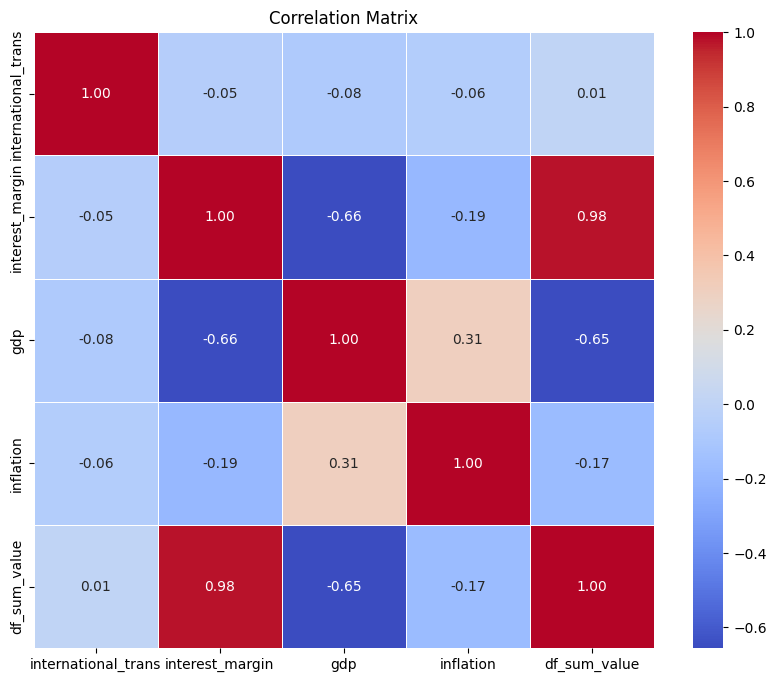

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
start_date = '2020-11-01'
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'] >= pd.to_datetime(start_date)]
df_corr = df.drop(columns=['date']) 
correlation_matrix = df_corr.corr()
#[['international_trans,interest_margin,gdp,inflation,df_sum_value']]
# 显示相关系数矩阵
print(correlation_matrix)

# 可视化相关系数矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

                     international_trans  interest_margin       gdp  \
international_trans             1.000000         0.518061 -0.403698   
interest_margin                 0.518061         1.000000 -0.792142   
gdp                            -0.403698        -0.792142  1.000000   
inflation                      -0.540745        -0.719432  0.496977   
df_sum_value                    0.622507         0.926319 -0.751046   

                     inflation  df_sum_value  
international_trans  -0.540745      0.622507  
interest_margin      -0.719432      0.926319  
gdp                   0.496977     -0.751046  
inflation             1.000000     -0.645155  
df_sum_value         -0.645155      1.000000  


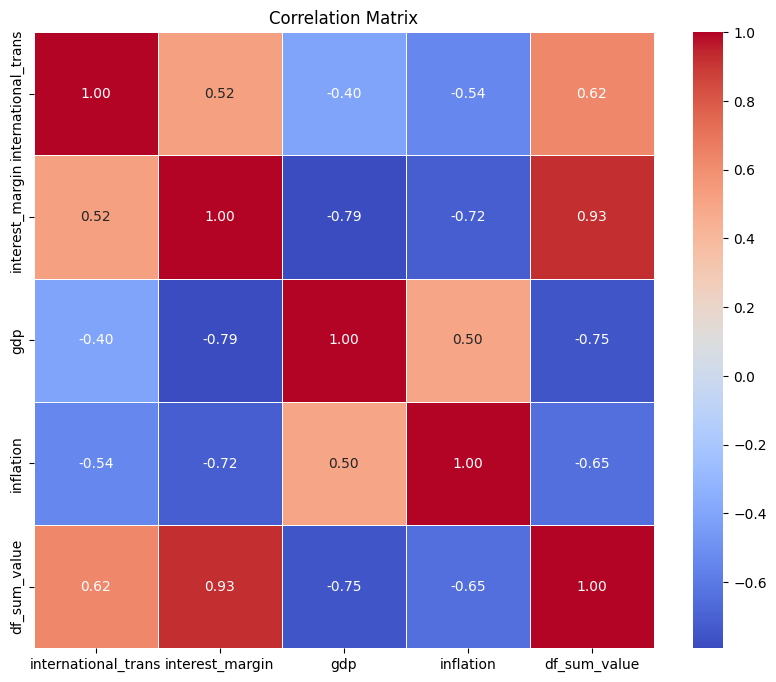

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
df_corr = df.drop(columns=['date']) 
correlation_matrix = df_corr.corr()
#[['international_trans,interest_margin,gdp,inflation,df_sum_value']]
# 显示相关系数矩阵
print(correlation_matrix)

# 可视化相关系数矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 加载数据
df_pro = pd.read_csv('/kaggle/input/df-shizheng/merged_data.csv', delimiter=';')
df_pro['date'] = pd.to_datetime(df_pro['date'])
df_pro['date'] = df_pro['date'].dt.strftime('%Y-%m')

# 单独处理数值列
numeric_cols = df_pro.select_dtypes(include=[np.number])

# 检查无穷大值
if np.isinf(numeric_cols.values).any():
    print("Data contains infinity values")
    numeric_cols = numeric_cols.replace([np.inf, -np.inf], np.nan)  # 替换无穷大为NaN

# 更新回原始df
df_pro[numeric_cols.columns] = numeric_cols

# 检查NaN值
if df_pro.isnull().values.any():
    print("Data contains nan values")
    # 使用平均值填充NaN，只对数值型列计算平均值
    df_pro.fillna(df_pro.mean(numeric_only=True), inplace=True)

# 标准化
scaler = StandardScaler()
features = ['international_trans', 'interest_margin', 'gdp', 'inflation']
df_pro[features] = scaler.fit_transform(df_pro[features])

# 准备输入和输出
X = df_pro[features]
y = df_pro['df_sum_value']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测和评估
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


Data contains infinity values
Data contains nan values
MAE: 2.60
RMSE: 3.51


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 假设df是你的DataFrame，且所有列都是数值变量，没有缺失值
df_VIF=df.drop(columns=['date','df_sum_value']) 
# 给数据添加常数项，以便用于计算VIF
X = add_constant(df_VIF)

# 创建一个空的DataFrame来存储VIF值
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# 计算每个特征的VIF值
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data
#VIF 值在 1 到 5 之间通常被认为是可接受的，说明共线性处于可控制的水平。
#VIF 值大于 5 可能表明中度共线性，值得进一步的关注。

,feature,VIF
0,const,231.343707
1,international_trans,1.487845
2,interest_margin,4.390542
3,gdp,2.770309
4,inflation,2.324804


In [8]:
vif_data=vif_data[1:]
vif_data

,feature,VIF
1,international_trans,1.487845
2,interest_margin,4.390542
3,gdp,2.770309
4,inflation,2.324804


In [9]:
import statsmodels.api as sm

# 假设df是你的DataFrame，并且已经准备好用于回归分析
# 因变量
y = df['df_sum_value']

# 自变量，这里去除了'const'项，因为我们将在下一步中添加
X = df[['international_trans', 'interest_margin', 'gdp', 'inflation']]

# 给自变量X添加一个常数项，以便模型中包含截距
X = sm.add_constant(X)

# 构建多元线性回归模型
model = sm.OLS(y, X).fit()

# 查看回归分析摘要
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           df_sum_value   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     47.85
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           8.00e-11
Time:                        11:57:32   Log-Likelihood:                -73.776
No. Observations:                  28   AIC:                             157.6
Df Residuals:                      23   BIC:                             164.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 104.1092    

In [10]:
#这边预测一下吧，不要做ADF检验

In [15]:
df

,date,international_trans,interest_margin,gdp,inflation,df_sum_value
0,2024-04,-3346.33,3.670067,-0.2,1.370370,153.20
1,2024-03,-4103.00,3.468048,0.3,1.461538,149.79
2,2024-02,-4103.00,3.501286,0.3,1.357143,149.62
3,2024-01,-4103.00,3.405682,0.3,1.950000,146.04
4,2023-12,-5524.33,3.347286,-2.2,1.695652,143.78
...,...,...,...,...,...,...
109,2015-03,-4488.67,1.656864,-3.5,0.818182,120.36
110,2015-02,-4488.67,1.599789,-3.5,0.850000,118.77
111,2015-01,-4488.67,1.580105,-3.5,0.727273,118.32
112,2014-12,-5077.00,1.840500,-2.3,0.640000,119.45


In [6]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb


In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
df_10.replace([np.inf, -np.inf], np.nan, inplace=True)  # 将无穷大值替换为NaN
df_10.dropna(inplace=True)  # 移除含有NaN的行
# 假设df_pro已经包含了日期和特征数据
df_10['date'] = pd.to_datetime(df_10['date'])
df_10.sort_values('date', inplace=True)

# 特征列表
features = ['international_trans', 'interest_margin', 'gdp', 'inflation']
future_df={}
# 用于存储每个特征预测结果的字典
new_data = {
    "gdp": [
    -1.77437868, -2.15764337, -1.55364096, -0.51492253, -0.58613804, 
    -0.58655402, -0.3356812, -0.24983352, 0.96955275, 2.44965693, 
    2.00754822, 1.88241514
],
    "interest_margin": [
    1.99419988, 1.98016517, 1.83673516, 1.65845625, 1.58638409, 
    1.66390649, 1.81268915, 1.92166999, 1.88731753, 1.72456971, 
    1.54328949, 1.53919529
],
    "inflation": [
    -0.94658923, -3.38207996, 9.84319895, 4.33606654, 5.78235304, 
    -0.48309803, -4.95896, -6.13684475, 7.55097443, 7.47244167, 
    -4.68576306, 8.64324498
],
    "international_trans":[
    -5441.11046455, -5163.37107087, -5263.13449679, -5316.86102603, 
    -5444.69779937, -5104.69390888, -5335.29392378, -5890.1930611, 
    -5763.72405377, -5616.62231947, -4196.71574487, -4406.28280618
]
}
start_date = "2024-05"
end_date = "2025-05"
future_dates = pd.date_range(start=start_date, end=end_date, freq='M')
future_dates = future_dates.strftime('%Y-%m')
# 将新数据填充到 DataFrame 中
#for column, values in new_data.items():
#    future_df[column] = values
future_df = pd.DataFrame(new_data, index=future_dates)
# 输出填充数据后的 DataFrame
print(future_df)


              gdp  interest_margin  inflation  international_trans
2024-05 -1.774379         1.994200  -0.946589         -5441.110465
2024-06 -2.157643         1.980165  -3.382080         -5163.371071
2024-07 -1.553641         1.836735   9.843199         -5263.134497
2024-08 -0.514923         1.658456   4.336067         -5316.861026
2024-09 -0.586138         1.586384   5.782353         -5444.697799
2024-10 -0.586554         1.663906  -0.483098         -5104.693909
2024-11 -0.335681         1.812689  -4.958960         -5335.293924
2024-12 -0.249834         1.921670  -6.136845         -5890.193061
2025-01  0.969553         1.887318   7.550974         -5763.724054
2025-02  2.449657         1.724570   7.472442         -5616.622319
2025-03  2.007548         1.543289  -4.685763         -4196.715745
2025-04  1.882415         1.539195   8.643245         -4406.282806


/tmp/ipykernel_34/2975566495.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=start_date, end=end_date, freq='M')


In [15]:
future_df

,gdp,interest_margin,inflation,international_trans
2024-05,-1.774379,1.994200,-0.946589,-5441.110465
2024-06,-2.157643,1.980165,-3.382080,-5163.371071
2024-07,-1.553641,1.836735,9.843199,-5263.134497
2024-08,-0.514923,1.658456,4.336067,-5316.861026
2024-09,-0.586138,1.586384,5.782353,-5444.697799
2024-10,-0.586554,1.663906,-0.483098,-5104.693909
2024-11,-0.335681,1.812689,-4.958960,-5335.293924
2024-12,-0.249834,1.921670,-6.136845,-5890.193061
2025-01,0.969553,1.887318,7.550974,-5763.724054
2025-02,2.449657,1.724570,7.472442,-5616.622319


In [17]:
df_10

,date,international_trans,interest_margin,gdp,inflation,df_sum_value
113,2014-11-01,-5077.00,1.892800,-2.3,0.629630,118.06
112,2014-12-01,-5077.00,1.840500,-2.3,0.640000,119.45
111,2015-01-01,-4488.67,1.580105,-3.5,0.727273,118.32
110,2015-02-01,-4488.67,1.599789,-3.5,0.850000,118.77
109,2015-03-01,-4488.67,1.656864,-3.5,0.818182,120.36
...,...,...,...,...,...,...
4,2023-12-01,-5524.33,3.347286,-2.2,1.695652,143.78
3,2024-01-01,-4103.00,3.405682,0.3,1.950000,146.04
2,2024-02-01,-4103.00,3.501286,0.3,1.357143,149.62
1,2024-03-01,-4103.00,3.468048,0.3,1.461538,149.79


In [22]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# 假设 future_df 包含所有预测的特征值
features = ['international_trans', 'interest_margin', 'gdp', 'inflation']
future_df = pd.DataFrame({
    'international_trans': future_df['international_trans'],
    'interest_margin': future_df['interest_margin'],
    'gdp': future_df['gdp'],
    'inflation': future_df['inflation']
}, index=future_dates)

# 准备用于训练的完整特征数据
X = df_10[features]  # 使用历史数据的特征
y = df_10['df_sum_value']  # 目标变量

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

# 使用随机森林模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(xgb_predictions)
print(rf_predictions)
"""
# 用LightGBM进行最终预测
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# 准备数据
final_train_data = lgb.Dataset(X_train, label=y_train)
final_test_data = lgb.Dataset(X_test, label=y_test, reference=final_train_data)
final_model = lgb.train(params, final_train_data, valid_sets=[final_test_data], num_boost_round=50)

# 使用预测的特征值进行最终预测
X_final = future_df[features].values
final_predictions = final_model.predict(X_final)

#print("Future GDP Predictions:", predicted_gdp)
print("Final Predictions:", final_predictions)
"""

[113.785515 116.76044  118.50112  128.79933  108.63325  104.897934
 110.74168  111.70123  113.97032  115.918495 118.09302  113.923004
 118.55947  118.40997  102.91876  105.26997  108.99464  110.3866
 145.32217  109.23083  115.918495 107.01891 ]
[113.8487 118.5521 117.8768 126.6992 110.5424 104.7488 110.1105 117.379
 120.8705 117.338  117.4629 114.3018 116.7842 117.4743 103.7781 106.0182
 110.0053 114.6121 144.2296 110.7727 117.2501 108.6038]


'\n# 用LightGBM进行最终预测\nparams = {\n    \'boosting_type\': \'gbdt\',\n    \'objective\': \'regression\',\n    \'metric\': \'rmse\',\n    \'num_leaves\': 31,\n    \'learning_rate\': 0.05,\n    \'feature_fraction\': 0.9,\n    \'bagging_fraction\': 0.8,\n    \'bagging_freq\': 5,\n    \'verbose\': 0\n}\n\n# 准备数据\nfinal_train_data = lgb.Dataset(X_train, label=y_train)\nfinal_test_data = lgb.Dataset(X_test, label=y_test, reference=final_train_data)\nfinal_model = lgb.train(params, final_train_data, valid_sets=[final_test_data], num_boost_round=50)\n\n# 使用预测的特征值进行最终预测\nX_final = future_df[features].values\nfinal_predictions = final_model.predict(X_final)\n\n#print("Future GDP Predictions:", predicted_gdp)\nprint("Final Predictions:", final_predictions)\n'

In [66]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# 假设 future_df 包含所有预测的特征值
features = ['international_trans', 'interest_margin']
future_df = pd.DataFrame({
    'international_trans': future_df['international_trans'],
    'interest_margin': future_df['interest_margin']
}, index=future_dates)

# 准备用于训练的完整特征数据
X = df_10[features]  # 使用历史数据的特征
y = df_10['df_sum_value']  # 目标变量

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions1 = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions1))

# 使用随机森林模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions1 = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions1))
print(xgb_predictions1)
print(rf_predictions1)

[110.78939  136.18784  105.7033   111.92719  136.26955  105.90786
 110.328636 113.35347  107.72798  132.0765   111.46321  109.397964
 110.311195 111.67717  144.09569  149.13857  110.328636 116.38573
 110.382545 111.054756 118.65992  104.90951  119.084656]
[110.627  137.9874 105.9845 111.1552 137.9874 106.0709 111.1493 119.0661
 107.6207 137.8591 112.7202 109.9087 110.1949 120.0283 145.6864 147.9218
 109.0946 116.324  110.2504 109.2906 121.493  105.7785 127.6387]


In [67]:
import numpy as np

# 给定的值
values1 = np.array([
    110.78939, 136.18784, 105.7033, 111.92719, 136.26955, 105.90786,
    110.328636, 113.35347, 107.72798, 132.0765, 111.46321, 109.397964
])

values2 = np.array([
    110.627, 137.9874, 105.9845, 111.1552, 137.9874, 106.0709, 
    111.1493, 119.0661, 107.6207, 137.8591, 112.7202, 109.9087, 
])

# 目标值
target_value = 153.2

# 计算每个值与目标值的差异
diff1 = target_value - np.mean(values1)
diff2 = target_value - np.mean(values2)

# 将差异添加到所有值上
adjusted_values1 = values1 + diff1
adjusted_values2 = values2 + diff2

print("调整后的值1:", adjusted_values1)
print("调整后的值2:", adjusted_values2)

调整后的值1: [148.06164917 173.46009917 142.97555917 149.19944917 173.54180917
 143.18011917 147.60089517 150.62572917 145.00023917 169.34875917
 148.73546917 146.67022317]
调整后的值2: [146.48229167 173.84269167 141.83979167 147.01049167 173.84269167
 141.92619167 147.00459167 154.92139167 143.47599167 173.71439167
 148.57549167 145.76399167]


In [68]:
import pandas as pd

# 确保日期列是正确的Timestamp类型
df['date'] = pd.to_datetime(df['date'])

# 获取最后一个日期，并检查其类型
last_date = df['date'].max()
print("Last date type:", type(last_date))  # 打印出last_date的数据类型

# 尝试添加Timedelta
try:
    new_start_date = last_date + pd.Timedelta(days=1)
    print("New start date type:", type(new_start_date))  # 检查新日期的类型

    # 创建日期范围
    future_dates = pd.date_range(start=new_start_date, periods=adjusted_values1.shape[0], freq='MS')
    
    # 创建DataFrame
    future_df1 = pd.DataFrame({
        'Date': future_dates.strftime('%Y-%m'),
        'Exchange Rate': adjusted_values1
    })

    print(future_df1)
except Exception as e:
    print("Error during date operations:", e)

Last date type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
New start date type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
       Date  Exchange Rate
0   2024-05     148.061649
1   2024-06     173.460099
2   2024-07     142.975559
3   2024-08     149.199449
4   2024-09     173.541809
5   2024-10     143.180119
6   2024-11     147.600895
7   2024-12     150.625729
8   2025-01     145.000239
9   2025-02     169.348759
10  2025-03     148.735469
11  2025-04     146.670223


In [69]:
import pandas as pd

# 确保日期列是正确的Timestamp类型
df['date'] = pd.to_datetime(df['date'])

# 获取最后一个日期，并检查其类型
last_date = df['date'].max()
print("Last date type:", type(last_date))  # 打印出last_date的数据类型

# 尝试添加Timedelta
try:
    new_start_date = last_date + pd.Timedelta(days=1)
    print("New start date type:", type(new_start_date))  # 检查新日期的类型

    # 创建日期范围
    future_dates = pd.date_range(start=new_start_date, periods=adjusted_values2.shape[0], freq='MS')
    
    # 创建DataFrame
    future_df1 = pd.DataFrame({
        'Date': future_dates.strftime('%Y-%m'),
        'Exchange Rate': adjusted_values1
    })

    print(future_df2)
except Exception as e:
    print("Error during date operations:", e)

Last date type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
New start date type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
       Date  Exchange Rate
0   2024-05     151.237808
1   2024-06     155.941208
2   2024-07     155.265908
3   2024-08     164.088308
4   2024-09     147.931508
5   2024-10     142.137908
6   2024-11     147.499608
7   2024-12     154.768108
8   2025-01     158.259608
9   2025-02     154.727108
10  2025-03     154.852008
11  2025-04     151.690908


In [65]:
import numpy as np
nested_list = [
    [149.43117613], [149.85477365], [150.01077156], [150.02286272], [149.95917552], 
    [149.87602274], [149.7956796], [149.74081246], [149.71739888], [149.72224941], 
    [149.7432638], [149.77596004], [149.81064841], [149.84599781], [149.88113631], 
    [149.91616257], [149.95296894], [149.98485676], [150.01090535], [150.02662816], 
    [150.03316809], [150.02578573], [149.99740031], [149.93887657], [149.85948244], 
    [149.76307406], [149.64940654], [149.52734527], [149.41450884], [149.32475604], 
    [149.25689636], [149.21173707], [149.18668171], [149.17666773], [149.17670401], 
    [149.18316003], [149.19360033], [149.20631056], [149.22022718], [149.23479576], 
    [149.24975663], [149.26497716], [149.2803791], [149.29587174], [149.31135078], 
    [149.32670623], [149.34183492], [149.3566552], [149.37108204], [149.38502248], 
    [149.39836198], [149.41099284], [149.4227926], [149.43360026], [149.44319246], 
    [149.45134469], [149.45786648], [149.4625764], [149.46534862], [149.46616384], 
    [149.46515587], [149.4625696], [149.45871231], [149.45392755], [149.4485498], 
    [149.44287045], [149.43712647], [149.43149701], [149.42611699], [149.42106918], 
    [149.41641821], [149.41219583], [149.40842245], [149.40510826], [149.40224988], 
    [149.39984163], [149.39787216], [149.39632449], [149.39517819], [149.39441285], 
    [149.39400241], [149.3939185], [149.3941328], [149.39461467], [149.39533125], 
    [149.39625192], [149.397337], [149.3985536], [149.39986317], [149.40122717], 
    [149.40260817], [149.4039665], [149.40527154], [149.40649267], [149.40760836], 
    [149.40860273], [149.4094633], [149.41018555], [149.41076947], [149.41121734]
]

values3 = [item for sublist in nested_list for item in sublist]

print(values3)

# 给定的值
#values3 = np.array([113.785515, 116.76044, 118.50112, 128.79933, 108.63325, 104.897934,
#                    110.74168, 111.70123, 113.97032, 115.918495, 118.09302, 113.923004
 #                   ])


# 目标值
target_value = 155.6

# 计算每个值与目标值的差异
diff3 = target_value - np.mean(values3)

# 将差异添加到所有值上
adjusted_values3 = values3 + diff3

print("调整后的值1:", adjusted_values3)

[149.43117613, 149.85477365, 150.01077156, 150.02286272, 149.95917552, 149.87602274, 149.7956796, 149.74081246, 149.71739888, 149.72224941, 149.7432638, 149.77596004, 149.81064841, 149.84599781, 149.88113631, 149.91616257, 149.95296894, 149.98485676, 150.01090535, 150.02662816, 150.03316809, 150.02578573, 149.99740031, 149.93887657, 149.85948244, 149.76307406, 149.64940654, 149.52734527, 149.41450884, 149.32475604, 149.25689636, 149.21173707, 149.18668171, 149.17666773, 149.17670401, 149.18316003, 149.19360033, 149.20631056, 149.22022718, 149.23479576, 149.24975663, 149.26497716, 149.2803791, 149.29587174, 149.31135078, 149.32670623, 149.34183492, 149.3566552, 149.37108204, 149.38502248, 149.39836198, 149.41099284, 149.4227926, 149.43360026, 149.44319246, 149.45134469, 149.45786648, 149.4625764, 149.46534862, 149.46616384, 149.46515587, 149.4625696, 149.45871231, 149.45392755, 149.4485498, 149.44287045, 149.43712647, 149.43149701, 149.42611699, 149.42106918, 149.41641821, 149.41219583,

In [37]:
import numpy as np

# 给定的值
values1 = np.array([113.785515, 116.76044, 118.50112, 128.79933, 108.63325, 104.897934,
                    110.74168, 111.70123, 113.97032, 115.918495, 118.09302, 113.923004
                    ])

values2 = np.array([113.8487, 118.5521, 117.8768, 126.6992, 110.5424, 104.7488,
                    110.1105, 117.379, 120.8705, 117.338, 117.4629, 114.3018
                    ])

# 目标值
target_value = 153.2

# 计算每个值与目标值的差异
diff1 = target_value - np.mean(values1)
diff2 = target_value - np.mean(values2)

# 将差异添加到所有值上
adjusted_values1 = values1 + diff1
adjusted_values2 = values2 + diff2

print("调整后的值1:", adjusted_values1)
print("调整后的值2:", adjusted_values2)


调整后的值1: [152.34173683 155.31666183 157.05734183 167.35555183 147.18947183
 143.45415583 149.29790183 150.25745183 152.52654183 154.47471683
 156.64924183 152.47922583]
调整后的值2: [151.23780833 155.94120833 155.26590833 164.08830833 147.93150833
 142.13790833 147.49960833 154.76810833 158.25960833 154.72710833
 154.85200833 151.69090833]


In [36]:
df

,date,international_trans,interest_margin,gdp,inflation,df_sum_value
0,2024-04,-3346.33,3.670067,-0.2,1.370370,153.20
1,2024-03,-4103.00,3.468048,0.3,1.461538,149.79
2,2024-02,-4103.00,3.501286,0.3,1.357143,149.62
3,2024-01,-4103.00,3.405682,0.3,1.950000,146.04
4,2023-12,-5524.33,3.347286,-2.2,1.695652,143.78
...,...,...,...,...,...,...
109,2015-03,-4488.67,1.656864,-3.5,0.818182,120.36
110,2015-02,-4488.67,1.599789,-3.5,0.850000,118.77
111,2015-01,-4488.67,1.580105,-3.5,0.727273,118.32
112,2014-12,-5077.00,1.840500,-2.3,0.640000,119.45


In [42]:
adjusted_values1

array([152.34173683, 155.31666183, 157.05734183, 167.35555183,
       147.18947183, 143.45415583, 149.29790183, 150.25745183,
       152.52654183, 154.47471683, 156.64924183, 152.47922583])

In [43]:
future_dates

Index(['2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10',
       '2024-11', '2024-12', '2025-01', '2025-02', '2025-03', '2025-04'],
      dtype='object')

In [45]:
import pandas as pd

# 确保日期列是正确的Timestamp类型
df['date'] = pd.to_datetime(df['date'])

# 获取最后一个日期，并检查其类型
last_date = df['date'].max()
print("Last date type:", type(last_date))  # 打印出last_date的数据类型

# 尝试添加Timedelta
try:
    new_start_date = last_date + pd.Timedelta(days=1)
    print("New start date type:", type(new_start_date))  # 检查新日期的类型

    # 创建日期范围
    future_dates = pd.date_range(start=new_start_date, periods=adjusted_values1.shape[0], freq='MS')
    
    # 创建DataFrame
    future_df1 = pd.DataFrame({
        'Date': future_dates.strftime('%Y-%m'),
        'Exchange Rate': adjusted_values1
    })

    print(future_df1)
except Exception as e:
    print("Error during date operations:", e)


Last date type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
New start date type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
       Date  Exchange Rate
0   2024-05     152.341737
1   2024-06     155.316662
2   2024-07     157.057342
3   2024-08     167.355552
4   2024-09     147.189472
5   2024-10     143.454156
6   2024-11     149.297902
7   2024-12     150.257452
8   2025-01     152.526542
9   2025-02     154.474717
10  2025-03     156.649242
11  2025-04     152.479226


In [46]:
import pandas as pd

# 确保日期列是正确的Timestamp类型
df['date'] = pd.to_datetime(df['date'])

# 获取最后一个日期，并检查其类型
last_date = df['date'].max()
print("Last date type:", type(last_date))  # 打印出last_date的数据类型

# 尝试添加Timedelta
try:
    new_start_date = last_date + pd.Timedelta(days=1)
    print("New start date type:", type(new_start_date))  # 检查新日期的类型

    # 创建日期范围
    future_dates = pd.date_range(start=new_start_date, periods=adjusted_values2.shape[0], freq='MS')
    
    # 创建DataFrame
    future_df2 = pd.DataFrame({
        'Date': future_dates.strftime('%Y-%m'),
        'Exchange Rate': adjusted_values2
    })

    print(future_df2)
except Exception as e:
    print("Error during date operations:", e)


Last date type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
New start date type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
       Date  Exchange Rate
0   2024-05     151.237808
1   2024-06     155.941208
2   2024-07     155.265908
3   2024-08     164.088308
4   2024-09     147.931508
5   2024-10     142.137908
6   2024-11     147.499608
7   2024-12     154.768108
8   2025-01     158.259608
9   2025-02     154.727108
10  2025-03     154.852008
11  2025-04     151.690908


In [32]:
df1=df

In [57]:
df1

,date,international_trans,interest_margin,gdp,inflation,df_sum_value
0,2024-04-01,-3346.33,3.670067,-0.2,1.370370,153.20
1,2024-03-01,-4103.00,3.468048,0.3,1.461538,149.79
2,2024-02-01,-4103.00,3.501286,0.3,1.357143,149.62
3,2024-01-01,-4103.00,3.405682,0.3,1.950000,146.04
4,2023-12-01,-5524.33,3.347286,-2.2,1.695652,143.78
...,...,...,...,...,...,...
109,2015-03-01,-4488.67,1.656864,-3.5,0.818182,120.36
110,2015-02-01,-4488.67,1.599789,-3.5,0.850000,118.77
111,2015-01-01,-4488.67,1.580105,-3.5,0.727273,118.32
112,2014-12-01,-5077.00,1.840500,-2.3,0.640000,119.45


In [59]:
future_df2

,Date,Exchange Rate
0,2024-05,151.237808
1,2024-06,155.941208
2,2024-07,155.265908
3,2024-08,164.088308
4,2024-09,147.931508
5,2024-10,142.137908
6,2024-11,147.499608
7,2024-12,154.768108
8,2025-01,158.259608
9,2025-02,154.727108


In [62]:
import altair as alt

# 创建历史数据图表
chart1 = alt.Chart(df1).mark_line(color='blue').encode(
    x=alt.X('date:T', title='Date'),
    y=alt.Y('df_sum_value:Q', title='JPY/USD Exchange Rate', scale=alt.Scale(domain=[100, 180]))
).properties(
    title='Historical JPY/USD Exchange Rates'
)

# 创建预测数据图表
chart2 = alt.Chart(future_df1).mark_line(color='red').encode(
    x=alt.X('Date:T', title='Date'),
    y=alt.Y('Exchange Rate:Q', title='JPY/USD Exchange Rate', scale=alt.Scale(domain=[100, 180]))
).properties(
    title='Predicted JPY/USD Exchange Rates'
)

chart3 = alt.Chart(future_df2).mark_line(color='brown').encode(
    x=alt.X('Date:T', title='Date'),
    y=alt.Y('Exchange Rate:Q', title='JPY/USD Exchange Rate', scale=alt.Scale(domain=[100, 180]))
).properties(
    title='Predicted JPY/USD Exchange Rates'
)
# 将两个图表合并
combined_chart = alt.layer(chart1, chart2,chart3).resolve_scale(
    y='shared'
).properties(
    width=800,
    height=400
)

combined_chart


alt.LayerChart(...)

In [70]:
import altair as alt

# 创建历史数据图表
chart1 = alt.Chart(df1).mark_line(color='blue').encode(
    x=alt.X('date:T', title='Date'),
    y=alt.Y('df_sum_value:Q', title='JPY/USD Exchange Rate', scale=alt.Scale(domain=[100, 180]))
).properties(
    title='Historical JPY/USD Exchange Rates'
)

# 创建预测数据图表
chart2 = alt.Chart(future_df1).mark_line(color='red').encode(
    x=alt.X('Date:T', title='Date'),
    y=alt.Y('Exchange Rate:Q', title='JPY/USD Exchange Rate', scale=alt.Scale(domain=[100, 180]))
).properties(
    title='Predicted JPY/USD Exchange Rates'
)

chart3 = alt.Chart(future_df2).mark_line(color='brown').encode(
    x=alt.X('Date:T', title='Date'),
    y=alt.Y('Exchange Rate:Q', title='JPY/USD Exchange Rate', scale=alt.Scale(domain=[100, 180]))
).properties(
    title='Predicted JPY/USD Exchange Rates'
)
# 将两个图表合并
combined_chart = alt.layer(chart1, chart2,chart3).resolve_scale(
    y='shared'
).properties(
    width=800,
    height=400
)

combined_chart

alt.LayerChart(...)

In [54]:
import altair as alt
#df1['date'] = pd.to_datetime(df1.index)
#df1.sort_values('date', inplace=True)
#df1['Date'] = df1['date'].dt.strftime('%Y-%m')  # 转换为字符串格式
#df1['Exchange Rate'] = df1['close']  # 重命名为'Exchange Rate'以便在图表中使用
min_exchange_rate = df1['df_sum_value'].min()



# 创建Altair图表
exchange_rate_chart = alt.Chart(df1).mark_line().encode(
    x='date:T',
    y=alt.Y('df_sum_value:Q', axis=alt.Axis(title='JPY/USD Exchange Rate'), scale=alt.Scale(domainMin=min_exchange_rate)),
    color=alt.value('red'),  # 利用不同颜色以区分
    tooltip=['Date:T', 'Exchange Rate:Q']
).properties(
    title='JPY/USD Exchange Rate Over Time'
).properties(
    width=800,
    height=400
)

chart = alt.Chart(future_df1).mark_line(color='red').encode(
    x=alt.X('Date:T', title='Date'),
    y=alt.Y('df_sum_value:Q', axis=alt.Axis(title='JPY/USD Exchange Rate'), scale=alt.Scale(domainMin=min_exchange_rate)),
    color=alt.value('red'),  # 利用不同颜色以区分
    tooltip=['Date:T', 'Exchange Rate:Q']
).properties(
    title='JPY/USD Exchange Rate Over Time'
).properties(
    width=800,
    height=400
)
final_chart = alt.layer(chart, exchange_rate_chart).resolve_scale(
    y='independent'  # Y轴独立缩放
).properties(
    title='US-JPN Interest Margin and JPY/USD Exchange Rate Comparison',
    width=800
)

# 显示图表
final_chart.display()

alt.LayerChart(...)

In [11]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
#alt.data_transformers.disable_max_rows()
# 替换 YOUR_API_KEY 为您从 Alpha Vantage 获取的API密钥
API_KEY = 'UTX653YK0YHRUAPO'
URL = "https://www.alphavantage.co/query"

# 设置请求参数
params = {
    "function": "FX_DAILY",
    "from_symbol": "USD",
    "to_symbol": "JPY",
    "apikey": API_KEY,
    "outputsize": "full",  # 或者使用 "compact" 仅获取最近100条数据
    "datatype": "json"
}

# 发送请求
response = requests.get(URL, params=params)
data = response.json()

In [ ]:
# 解析数据
df1 = pd.DataFrame(data['Time Series FX (Daily)']).T
df1.columns = ['open', 'high', 'low', 'close']  # 根据API的实际输出调整列名
df1 = df1.apply(pd.to_numeric)
df1['date'] = pd.to_datetime(df1.index)
df1.sort_values('date', inplace=True)
df1['Date'] = df1['date'].dt.strftime('%Y-%m-%d')  # 转换为字符串格式
df1['Exchange Rate'] = df1['close']  # 重命名为'Exchange Rate'以便在图表中使用
min_exchange_rate = df1['Exchange Rate'].min()

# 创建Altair图表
chart = alt.Chart(df1).mark_line().encode(
    x=alt.X('Date:T', axis=alt.Axis(title='Date', format='%Y-%m-%d'), timeUnit='yearmonthdate'),  # 使用timeUnit确保日期以年月日的形式显示
    y=alt.Y('Exchange Rate:Q', axis=alt.Axis(title='Exchange Rate'), scale=alt.Scale(domainMin=min_exchange_rate)),  # 设置最小值为数据的最小值
    color=alt.value('lightgrey'),
    tooltip=['Date:T', 'Exchange Rate:Q']  # 添加悬停提示工具
).properties(
    title='JPY/USD Exchange Rate Over Time',
    
    width=800  # 设置图表宽度
)
chart

In [ ]:
start_date = '2022-01-01'
df2 = df1[df1.index >= start_date]

In [ ]:
df2